### 📊 Exploring Data Clusters with PCA and K-Means!

Just applied Principal Component Analysis (PCA) combined with K-Means clustering to gain insights from my dataset. 🧩



Use-Case:


You are provided with data (data_test_clustering_A1.csv) that consists of 8 features for each row.
Analyze the data within the index range (24608, 25416).
All floats are rounded to 3 digits!
Complete the report below with your findings from the data analysis.

1.  Based on 2D PCA visualization of data between indexes (24608, 25416), we can identify ---? (integer) distinct clusters.

2.  We randomly selected two rows (indexes) within this range for further analysis. The selected indexes are (161, 237).

3.  For index 161, the most significant PCA component value is ---? (float).

4.  For index 237, the second most significant PCA component value is ---? (float).

5.  The Euclidean distance between the PCA components of indexes (161, 237) is---? (float).

6.  After applying K-Means clustering with **random_state=0** to the specified data segment, it was found that the features from index 161 belong to cluster label --? (integer), and features from index 237 belong to cluster label ---? (integer).

#### Here, **PCA** and **Clustering** is done with standerdising the features

Calculated Euclidean distance for standerdised data is less compare to the unsatanderdised data but datapints belongs to simmilar clusters


In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset (replace 'your_data.csv' with your actual file)
data = pd.read_csv('data_test_clustering_A1.csv')
df = data.iloc[24608:25416].copy()

# Extract features (assuming you have 8 features)
features = df.columns[1:]  # Adjust column indexing based on your dataset

# Separate features from the target variable (if applicable)
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 2 components
pca = PCA(n_components=2)
pcas = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=pcas, columns=['PC1', 'PC2'])

# Cluster the data using K-Means
# how to decide boute no of clusters? Methods are explained below
n_clusters = 3  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)



### Longer but more informative

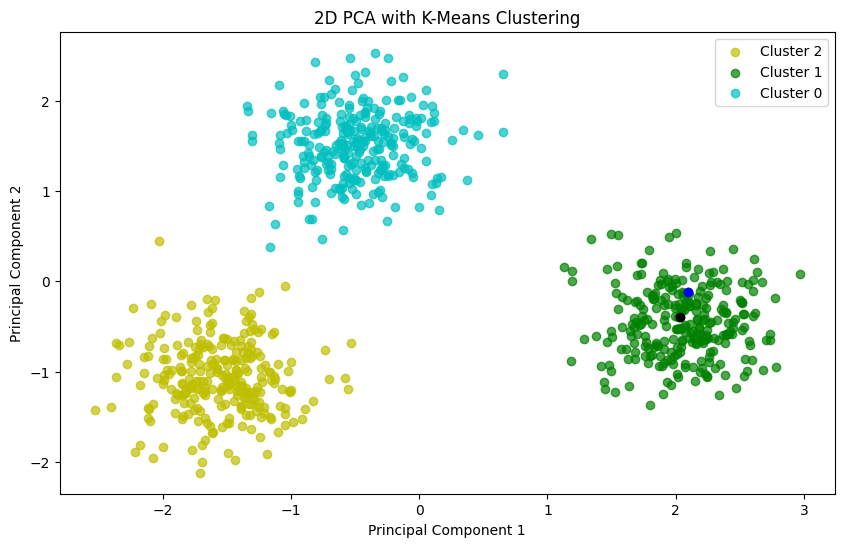

In [75]:


col =  [ 'c', 'g', 'y'] # if you wanna specify your own colors
# Plot 2D PCA with clustered data
clusters = df['Cluster'].unique()
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_indices = df['Cluster'].values == cluster
    plt.scatter(pc_df.loc[cluster_indices, 'PC1'],
                pc_df.loc[cluster_indices, 'PC2'],
                label=f'Cluster {clusters[cluster]}', alpha=0.7, c =col[clusters[cluster]] ) #remove cmap and set your cols

pc1_value = pc_df.loc[311, 'PC1']
pc2_value = pc_df.loc[311, 'PC2']
plt.scatter(pc1_value, pc2_value, c = 'k')
pc1_value2 = pc_df.loc[502, 'PC1']
pc2_value2 = pc_df.loc[502, 'PC2'] # added a small value to make it visible
plt.scatter(pc1_value2, pc2_value2, c = 'b')
plt.title('2D PCA with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Simplest ways to plot clusters

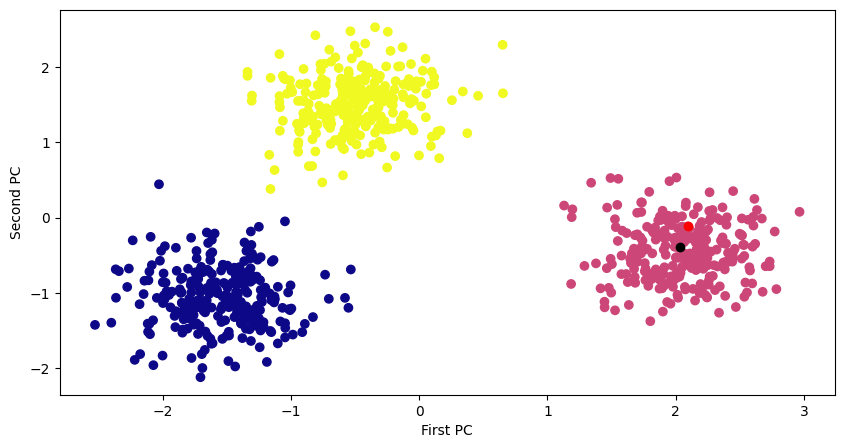

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(pcas[:, 0], pcas[:, 1], c = df['Cluster'], cmap = 'plasma')

plt.scatter(pcas[311, 0], pcas[311, 1], c = 'k')
plt.scatter(pcas[502, 0], pcas[502, 1], c = 'r')

plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

In [76]:
import numpy as np
random_index1 = 161
random_index2 = 237
# Extract PCA components for index 1
pc_i1 = pc_df.loc[random_index1, ['PC1', 'PC2']].values

# Extract PCA components for index 2
pc_i2 = pc_df.loc[random_index2, ['PC1', 'PC2']].values

# Calculate Euclidean distance
euclidean_distance = np.linalg.norm(pc_i1 - pc_i2)
print(f"The Euclidean distance between indexe {random_index1} and {random_index2} is: {euclidean_distance}")


The Euclidean distance between indexe 161 and 237 is: 0.7725529599543294


In [77]:
# Calculate Euclidean distance between Datapoint and a point a cluster 1
# cls = df[df['Cluster'].values==1].Cluster.values[1]
# pc_161 = pc_df.loc[161, ['PC1', 'PC2']].values
# euclidean_distance = np.linalg.norm(cls - pc_161)
# euclidean_distance

In [78]:
pc_df.iloc[random_index1]

PC1    1.692735
PC2   -0.450507
Name: 161, dtype: float64

In [79]:
pc_df.iloc[random_index2]

PC1    2.323217
PC2   -0.004042
Name: 237, dtype: float64

In [80]:
# Extract PCA components for randomly selected indexes
pc_pred1 = X_scaled[random_index1]
pc_pred2= X_scaled[random_index2]

# Reshape the array to match the shape used during clustering
pc_pred1 = pc_pred1.reshape(1, -1)
pc_pred2 = pc_pred2.reshape(1, -1)

# Get Prediction for cluster labels
cluster_label_i1 = kmeans.predict(pc_pred1)
cluster_label_i2 = kmeans.predict(pc_pred2)

print(f"The features at index {random_index1} belong to Cluster Label: {cluster_label_i1[0]}")
print(f"The features at index {random_index2} belong to Cluster Label: {cluster_label_i2[0]}")

The features at index 161 belong to Cluster Label: 1
The features at index 237 belong to Cluster Label: 1


###How to Decide No of Clusters?
The choice of the number of clusters in K-Means clustering is a crucial decision and often requires domain knowledge or experimentation. There are several methods to help determine the optimal number of clusters:

**Elbow Method:**

Plot the within-cluster sum of squares (inertia) as a function of the number of clusters.
Look for the "elbow" point, where the rate of decrease in inertia slows down.
The point where the inertia starts decreasing at a slower rate is often considered as the optimal number of clusters.

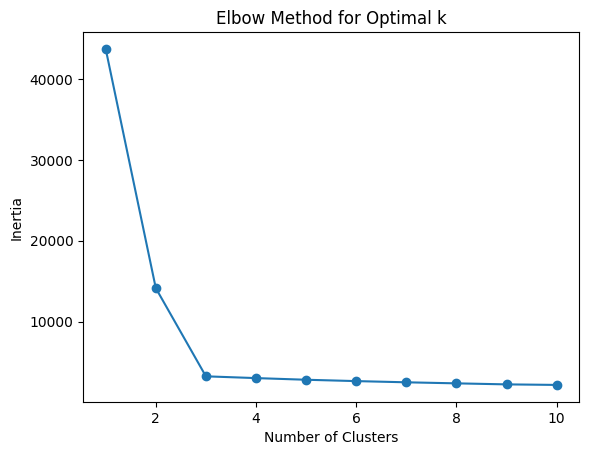

In [81]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is your feature matrix
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



**2. Silhouette Score:**

second Method to choose No of clusters
The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

**More:**

Choose the number of clusters that corresponds to the "elbow" or the highest silhouette score. Keep in mind that the optimal number of clusters is not always straightforward, and you may need to interpret the results in the context of your specific data and problem. Additionally, it's often a good idea to try different numbers of clusters and evaluate the results based on your domain knowledge and the goals of the analysis.

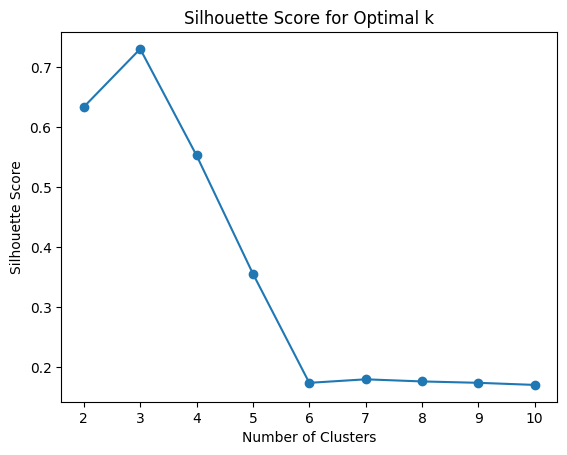

In [82]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


###Here, PCA and Clustering is done without standerdising the features

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [84]:
# Load your dataset (replace 'your_data.csv' with your actual file)
df = pd.read_csv('data_test_clustering_A1.csv')


In [85]:
df0 = df.iloc[24608: 25416].copy()
# Extract features (assuming you have numerical features)
features = df0.columns[1:]  # Adjust column indexing based on your dataset

# Separate features from the target variable (if applicable)
X1 = df0[features]
X1

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
24608,1.019970,-2.685991,1.835743,5.169714,0.0,0.0,0.0,0.0
24609,9.421474,-7.364449,-4.567131,1.973408,0.0,0.0,0.0,0.0
24610,3.267495,-3.811003,3.027464,4.681536,0.0,0.0,0.0,0.0
24611,5.549849,-9.798714,7.715269,6.915126,0.0,0.0,0.0,0.0
24612,2.763292,-4.460963,3.352498,4.043500,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25411,4.562030,-9.154312,8.259236,6.947531,0.0,0.0,0.0,0.0
25412,8.499449,-8.456591,-6.016794,1.951926,0.0,0.0,0.0,0.0
25413,4.827483,-10.616797,6.492193,6.270542,0.0,0.0,0.0,0.0
25414,3.121080,-2.982266,2.244435,4.677865,0.0,0.0,0.0,0.0


In [86]:

# Apply PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X1)

# Create a DataFrame with the principal components
pc_df0 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


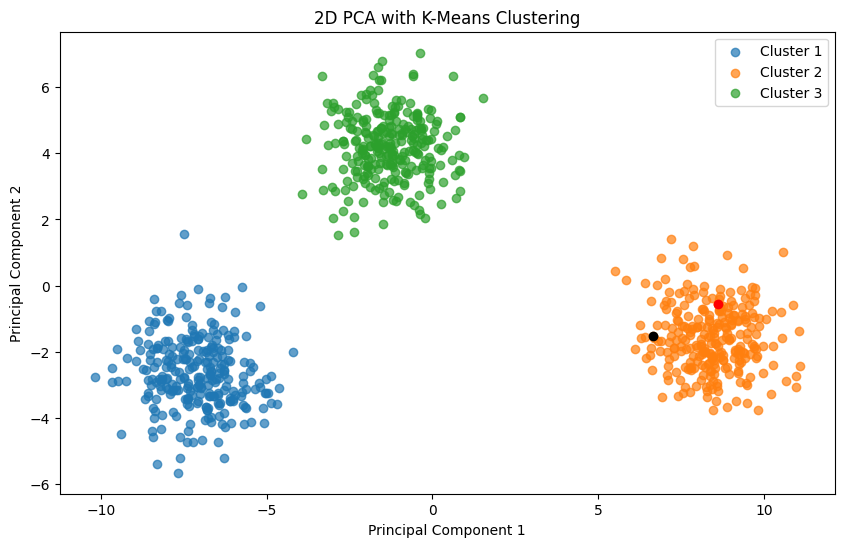

In [87]:

# Cluster the data using K-Means
n_clusters = 3  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df0['Cluster'] = kmeans.fit_predict(X1)



# col =  [ 'c', 'g', 'y'] # if you wanna specify your own colors
# Plot 2D PCA with clustered data
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_indices = df0['Cluster'].values == cluster
    plt.scatter(pc_df0.loc[cluster_indices, 'PC1'],
                pc_df0.loc[cluster_indices, 'PC2'],
                label=f'Cluster {cluster + 1}', alpha=0.7,cmap='plasma') #c =col[cluster -1] ) #remove cmap and set your cols

pc1_value = pc_df0.loc[161, 'PC1']
pc2_value = pc_df0.loc[161, 'PC2']
plt.scatter(pc1_value, pc2_value, c = 'k')
pc1_value2 = pc_df0.loc[237, 'PC1']
pc2_value2 = pc_df0.loc[237, 'PC2'] # added a small value to make it visible
plt.scatter(pc1_value2, pc2_value2, c = 'r')
plt.title('2D PCA with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [88]:
df0['Cluster'].iloc[161]

1

In [89]:
import numpy as np
random_index1 = 161
random_index2 =237
pc_i1 = pc_df0.loc[random_index1, ['PC1', 'PC2']].values

# Extract PCA components for index 237
pc_i2 = pc_df0.loc[random_index2, ['PC1', 'PC2']].values

# Calculate Euclidean distance
euclidean_distance = np.linalg.norm(pc_i1 - pc_i2)
print(f"The Euclidean distance between indexe {random_index1} and {random_index2} is: {euclidean_distance}")

The Euclidean distance between indexe 161 and 237 is: 2.1766955580316605


In [90]:
pc_df0.loc[161]

PC1    6.656011
PC2   -1.526807
Name: 161, dtype: float64

In [91]:
pc_df0.loc[237]

PC1    8.607910
PC2   -0.563431
Name: 237, dtype: float64

In [92]:
# Extract PCA components for indexes
pc_pred1 = np.array(X1.iloc[random_index1])
pc_pred2= np.array(X1.iloc[random_index2])

# Reshape the array to match the shape used during clustering
pc_pred1 = pc_pred1.reshape(1, -1)
pc_pred2 = pc_pred2.reshape(1, -1)
# Get the cluster label for indexes
cluster_label_i1 = kmeans.predict(pc_pred1)
cluster_label_i2 = kmeans.predict(pc_pred2)
print(f"The features at index {random_index1} belong to Cluster Label: {cluster_label_i1[0]}")
print(f"The features at index {random_index2} belong to Cluster Label: {cluster_label_i2[0]}")

The features at index 161 belong to Cluster Label: 1
The features at index 237 belong to Cluster Label: 1
